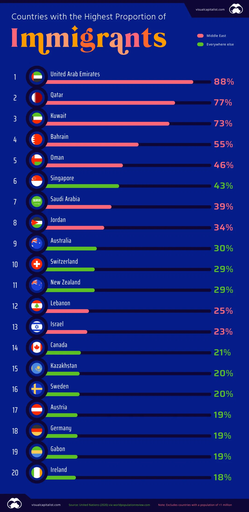

In [1]:
# 1. get infographic
import os
from PIL import Image
infographic_path = './cases'
file_name = '1.png'

def resize_image(img, max_size=512):
    width, height = img.size
    ratio = min(max_size / width, max_size / height)
    if ratio >= 1:
        return img
    new_width = int(width * ratio)
    new_height = int(height * ratio)
    resized_img = img.resize((new_width, new_height), Image.Resampling.LANCZOS)
    return resized_img
    
def display_image(file):    
    with Image.open(file) as img:
        img = resize_image(img, 512)
        display(img)

image_path = os.path.join(infographic_path, file_name)
display_image(image_path)

In [2]:
# 2. retrieve palette from image
from image2palette.palette import nets_init, generate_color_open

init = False
Sal, Sp = None, None

def get_palette(number, bcg_flag, image_path):
    global init, Sal, Sp
    if not init:
        Sal, Sp = nets_init()
        init = True
    return generate_color_open(number, bcg_flag, image_path, Sal, Sp)

# palette = get_palette(5, True, image_path)

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def display_colors(color_list, bcg_color):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 4))
    
    n_colors = len(color_list)
    for i, color in enumerate(color_list):
        rect = patches.Rectangle((i, 0), 1, 1, facecolor=color)
        ax1.add_patch(rect)
    
    ax1.set_xlim(-0.1, n_colors + 0.1)
    ax1.set_ylim(-0.1, 1.1)
    ax1.axis('equal')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_title('Color List')

    rect = patches.Rectangle((0, 0), 1, 1, facecolor=bcg_color)
    ax2.add_patch(rect)

    ax2.set_xlim(-0.1, 1.1)
    ax2.set_ylim(-0.1, 1.1)
    ax2.axis('equal')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_title('Background Color')
    
    plt.tight_layout()
    plt.show()

# color_data = {
#     'color_list': ['#A27657', '#D5926A', '#E26377', '#55AE2B', '#14424B'],
#     'bcg': '#00137F'
# }

# display_colors(color_data['color_list'], color_data['bcg'])

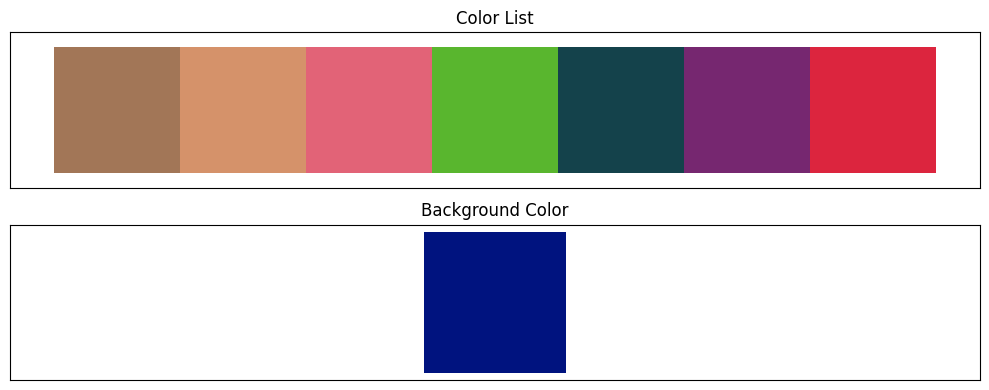

In [4]:
# color_data = get_palette(7, True, image_path)
color_data = {'color_list': ['#A27657',
  '#D5926A',
  '#E26377',
  '#59B62E',
  '#14424B',
  '#762770',
  '#DC253E'],
 'bcg': '#00137F'}
display_colors(color_data['color_list'], color_data['bcg'])

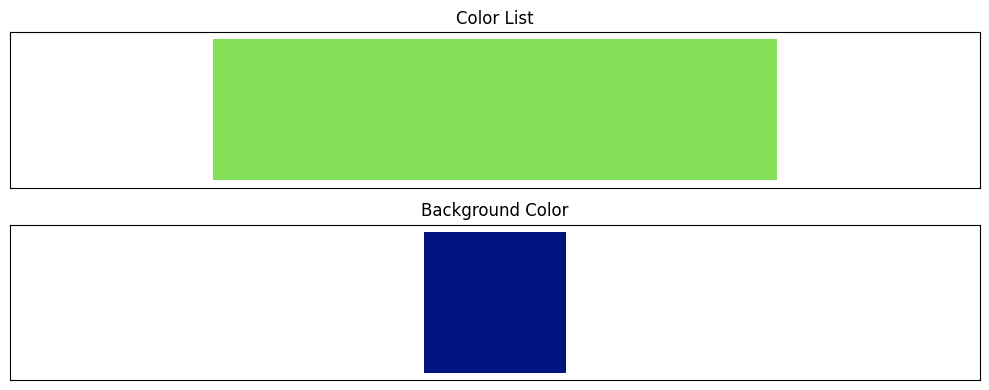

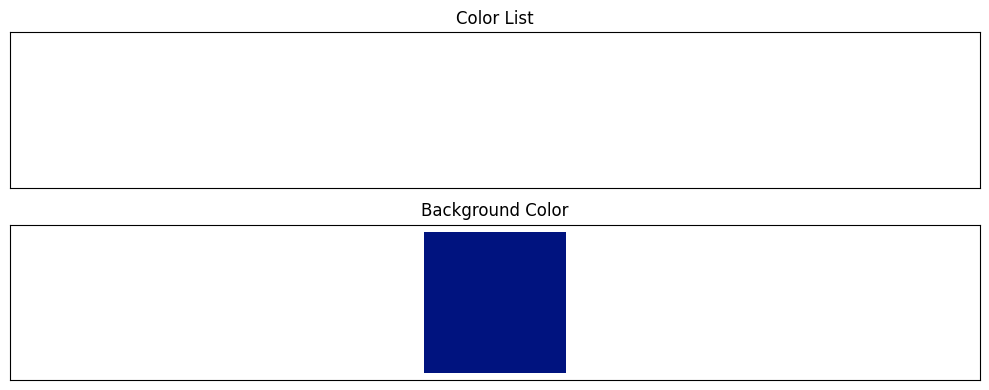

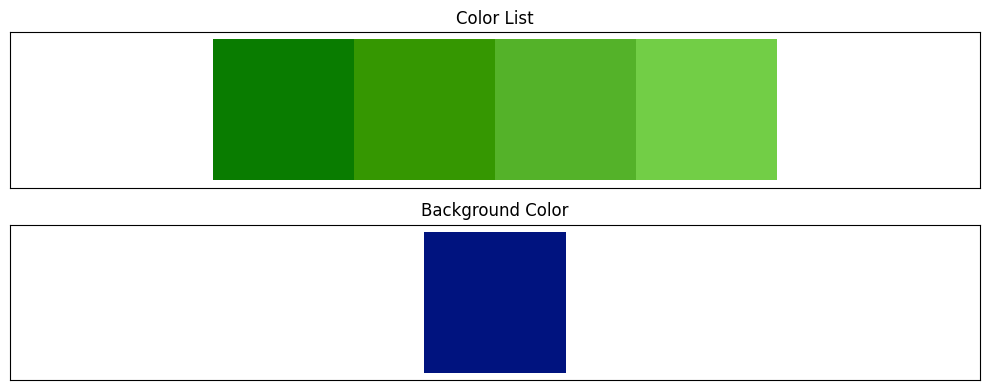

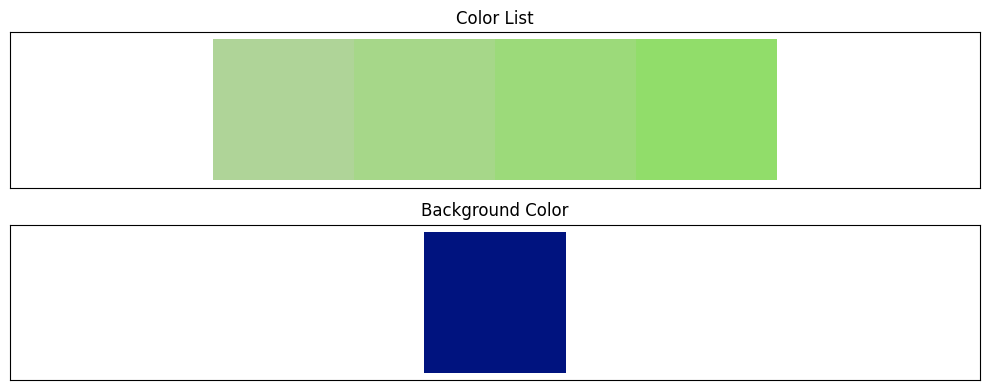

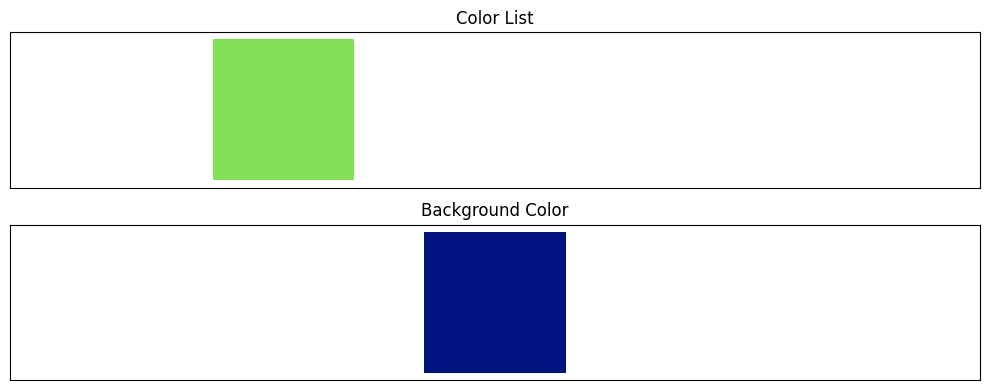

In [5]:
from color_template import ColorDesign
color_design1 = ColorDesign(color_data, mode='monochromatic')
bcg_color = color_design1.get_color('background', 1)[0]
for seed in range(5):
    text_colors = color_design1.get_color('text', 4, seed_text=seed)
    display_colors(text_colors, bcg_color)